### Name: C. J. Kurukulasuriya
### Index number: 190337X

### Q1

In [1]:
import numpy as np
from plyfile import PlyData, PlyElement #open3d
import matplotlib.pyplot as plt

In [13]:
pcd = PlyData.read('Images/airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1,-1), pcd['vertex']['y'].reshape(1,-1), 
pcd['vertex']['z'].reshape(1,-1)), axis = 0)

points -= np.mean(points, axis = 1).reshape(3,1)

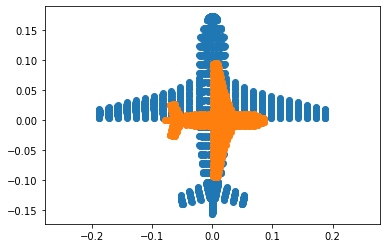

In [63]:

ones = np.ones((1, points.shape[1]))
X = np.concatenate((points, ones), axis = 0)

R = np.array([[1,0,0], [0,1,0], [0,0,1]]) # no rotation
K = np.array([[1,0,0], [0,1,0], [0,0,1]])
t = np.array([[0], [0], [-4000]])

P1 = K @ np.concatenate((R,t), axis = 1)

R = np.array([[0,1,0], [1,0,0],[0,0,1]]) 
K = np.array([[0.5,0,0], [0,0.5,0], [0,0,1]])
t = np.array([[0], [0], [-4000]])

P2 = K @ np.concatenate((R,t), axis = 1)

x1 = P1 @ X
x2 = P2 @ X

x1 = x1/x1[2,:]
x2 = x2/x2[2,:]

fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
ax.scatter(x1[0,:], x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis('equal')
plt.show()

### Q3

In [18]:
import cv2 as cv

Item 1 , area in pixels = 59143
Item 1 , area in mm^2 = 2318.642172
Item 2 , area in pixels = 59211
Item 2 , area in mm^2 = 2321.3080440000003


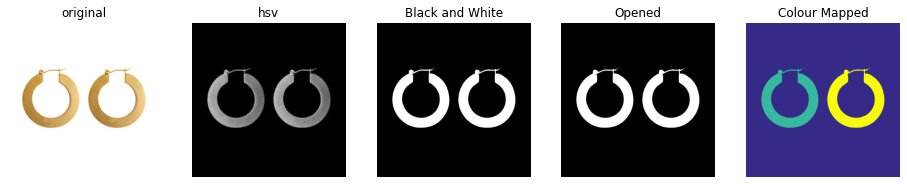

In [64]:
im = cv.imread('Images/earrings.jpg', cv.IMREAD_COLOR)
assert im is not None
hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
th, bw = cv.threshold(hsv[:,:,1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

w = 5
kernel = np.ones((w,w), np.uint8)
opened = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)

retval, labels, stats, centroids = cv.connectedComponentsWithStats(bw)

colorMapped = cv.applyColorMap((labels/np.amax(labels)*255).astype(np.uint8), cv.COLORMAP_PARULA)

z = 720 # mm
f = 8 # mm
for i, s in enumerate(stats):
    if i!=0:
        print('Item', i , ', area in pixels =', s[4])
        print('Item', i , ', area in mm^2 =',   s[4]*(2.2e-3)**2*(z**2)/(f**2))


# cv.imshow('Image', im)
# cv.waitKey(0)
# cv.imshow('Image hsv', hsv[:,:,1])
# cv.waitKey(0)
# cv.imshow('Image bw',bw)
# cv.waitKey(0)
# cv.imshow('Image opened',opened)
# cv.waitKey(0)
# cv.imshow('Image cmapped',colorMapped)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig, axs = plt.subplots(1,5, figsize=(16,5))
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
hsv = cv.cvtColor(hsv[:,:,1], cv.COLOR_BGR2RGB)
bw = cv.cvtColor(bw, cv.COLOR_BGR2RGB)
opened = cv.cvtColor(opened, cv.COLOR_BGR2RGB)
colorMapped = cv.cvtColor(colorMapped, cv.COLOR_BGR2RGB)

axs[0].imshow(im)
axs[0].set_title("original")
axs[1].imshow(hsv)
axs[1].set_title("hsv")
axs[2].imshow(bw)
axs[2].set_title("Black and White")
axs[3].imshow(opened)
axs[3].set_title("Opened")
axs[4].imshow(colorMapped)
axs[4].set_title("Colour Mapped")

for i in range(5):
    axs[i].axis('off')
